# Given a NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections. Implement a linear regression model from scratch using gradient descent to predict scaled sound pressure level 

In [34]:
import numpy as np
import pandas as pd
from numpy.random import RandomState
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Loading Data

In [35]:
df = pd.read_csv('/media/indranil/New Volume/second sem/SMAI/Assignment 2/q3/data/airfoil.csv',header = None)
df=(df-df.min())/(df.max()-df.min())
rng = RandomState()
train = df.sample(frac=0.8,random_state = rng)
validation = df.loc[~df.index.isin(train.index)]
X_train,Y_train_temp = train.iloc[:,1:], train.iloc[:,-1:]
X_validation,Y_validation_temp = validation.iloc[:, 1:], validation.iloc[:,-1:]
Y_train = []
Y_validation = []
for i in np.array(Y_train_temp):
    Y_train.append(i[0])
for i in np.array(Y_validation_temp):
    Y_validation.append(i[0])
X_train = np.array(X_train).astype('float')
Y_train = np.array(Y_train).astype('float')
X_validation = np.array(X_validation).astype('float')
Y_validation = np.array(Y_validation).astype('float')

# Prediction of result

In [3]:
def prediction(X_validation, newcoeff):
    return X_validation.dot(newcoeff)

# Calculation of cost

In [4]:
def cost_calculation(X_train, Y_train, Coefficient):
    leng = len(Y_train)
    sumcost = np.sum((X_train.dot(Coefficient) - Y_train) ** 2)
    cost = sumcost/(2 * leng)
    return cost

# Calculation of gradient

In [5]:
def calculate_gradient(weights,X_train, Y_train):
    leng = len(Y_train)
    return X_train.T.dot(weights-Y_train) / leng

# Calculation of coefficients

In [6]:
def calculate_coefficients(coefficients, learning_rate, gradient):
    cal_grad = learning_rate * gradient
    penalty = coefficients - cal_grad
    return penalty

# Implementation of gradient descent to minimize loss function

In [7]:
def gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs):
    costs = []
    for i in range(epochs):
        weights = X_train.dot(coefficients)
        gradient = calculate_gradient(weights, X_train, Y_train)
        coefficients = calculate_coefficients(coefficients, learning_rate, gradient)
        cost = cost_calculation(X_train, Y_train, coefficients)
        costs.append(cost)
    return coefficients, costs

# Mean Sqaured Error

In [8]:
def mean_square_error(y_real,y_prediction):
    summation = 0
    n = len(y_real)
    for i in range (0,n):
        difference = y_real[i] - y_prediction[i]
        squared_difference = difference**2
        summation = summation + squared_difference
    MSE = summation/n
    return MSE

# Learning Rate is fixed for below three experiments. The learning rate is 0.0003 and epochs 100000

# Taking coefficients all zero i.e. [0,0,0,0,0]

In [9]:
coefficients = np.zeros(X_train.shape[1])
learning_rate = 0.0003
epochs = 100000
newcoeff, cost1 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

0.0008471469393764089

# Plotting the cost(Y-axis) with the number of iterations(X-axis) 

Text(0, 0.5, 'cst')

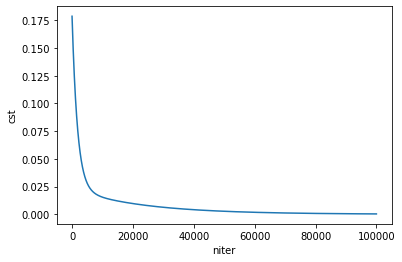

In [11]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost1)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

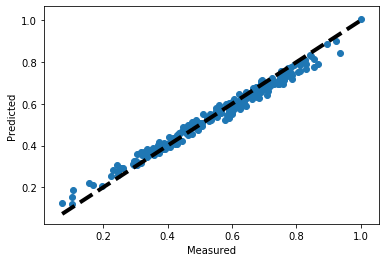

In [12]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Taking coefficients all 1.4 i.e. [1.4,1.4,1.4,1.4,1.4]

In [13]:
coefficients = np.full(X_train.shape[1],1.4)
learning_rate = 0.0003
epochs = 100000
newcoeff, cost2 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

0.0021500594201546547

# Plotting the cost(Y-axis) with the number of iterations(X-axis)

Text(0, 0.5, 'cst')

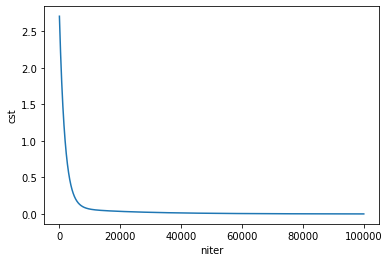

In [14]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost2)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

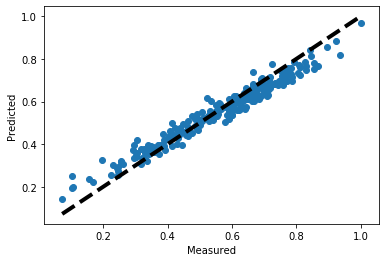

In [15]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Taking coefficients all 1.8 i.e. [1.8,1.8,1.8,1.8,1.8]

In [17]:
coefficients = np.full(X_train.shape[1],1.8)
learning_rate = 0.0003
epochs = 100000
newcoeff, cost3 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

0.0027960789120146253

# Plotting the cost(Y-axis) with the number of iterations(X-axis)

Text(0, 0.5, 'cst')

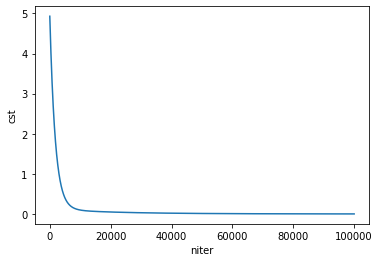

In [18]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost3)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

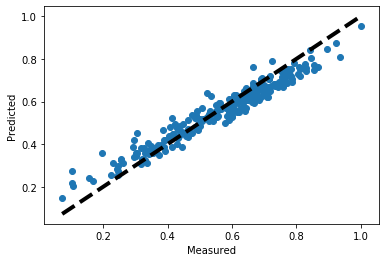

In [19]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Keeping the coefficients all zero i.e.- [0,0,0,0,0] for following three experiments and changing learning rate and taking epochs 100000

# Learning rate 0.0009

In [20]:
coefficients = np.zeros(X_train.shape[1])
learning_rate = 0.0009
epochs = 100000
newcoeff, cost4 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

4.6279998526554276e-05

# Plotting the cost(Y-axis) with the number of iterations(X-axis)

Text(0, 0.5, 'cst')

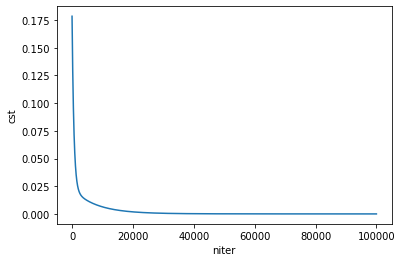

In [21]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost4)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

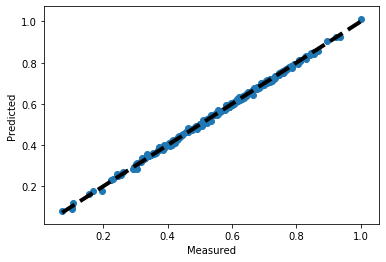

In [22]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Learning rate 0.0001

In [24]:
coefficients = np.zeros(X_train.shape[1])
learning_rate = 0.0001
epochs = 100000
newcoeff, cost5 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

0.01140623076641865

# Plotting the cost(Y-axis) with the number of iterations(X-axis)

Text(0, 0.5, 'cst')

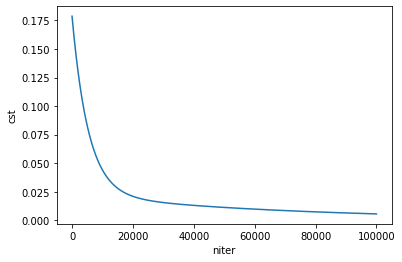

In [25]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost5)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

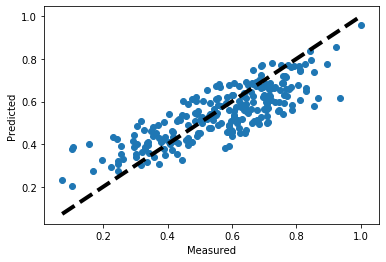

In [26]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Learning rate 0.005

In [28]:
coefficients = np.zeros(X_train.shape[1])
learning_rate = 0.005
epochs = 100000
newcoeff, cost6 = gradient_descent(X_train, Y_train, coefficients, learning_rate, epochs)
Y_predict = prediction(X_validation, newcoeff)
#print(Y_predict,Y_validation)
#for i in range(len(Y_predict)):
    #print(Y_predict[i]-Y_validation[i])
mean_square_error(Y_validation, Y_predict)
#r2_score(np.array(Y_validation), np.array(Y_predict))

4.4065385380278026e-09

# Plotting the cost(Y-axis) with the number of iterations(X-axis)

Text(0, 0.5, 'cst')

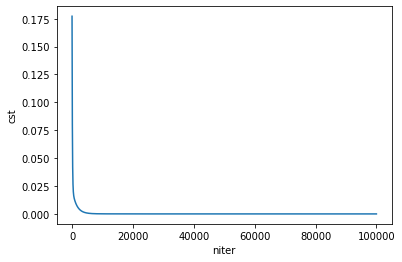

In [29]:
n_iter = [x for x in range(1,100001)]
plt.plot(n_iter,cost6)
plt.xlabel('niter')
plt.ylabel('cst')

# The best line-fitting

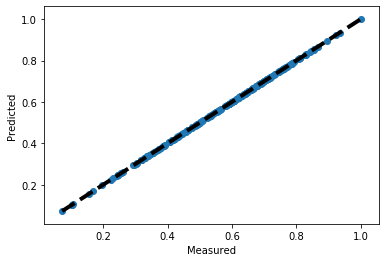

In [30]:
fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predict)
ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Keeping the learning rate same (0.0003) and changing coefficients {[0,0,0,0,0],[1.4,1.4,1.4,1.4,1.4],[1.8,1.8,1.8,1.8,1.8]} , the grph has been plotted for the cost and number of iteratons for three experiments

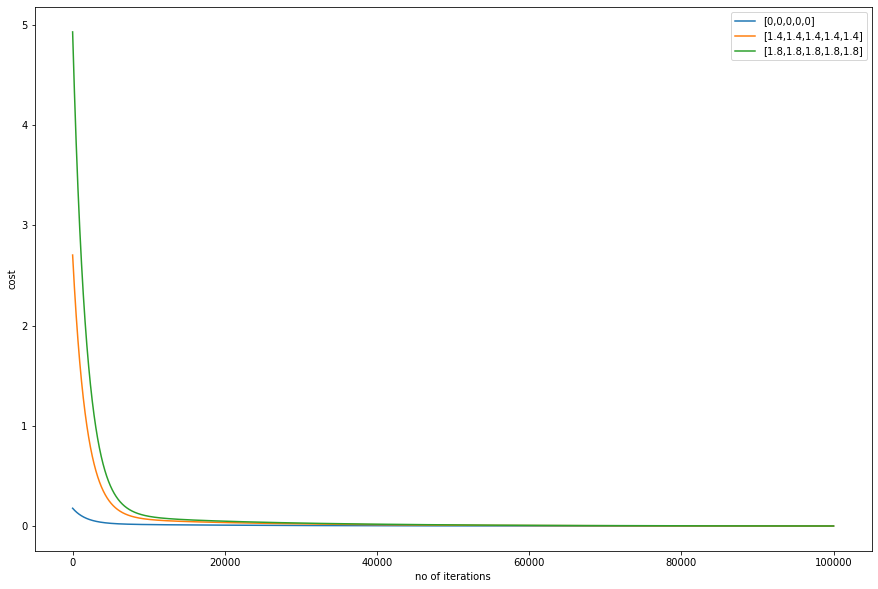

In [37]:
import matplotlib.pyplot as plt
x_axis = [*range(0, 100000, 1)]
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(x_axis, cost1, label = "[0,0,0,0,0]")
plt.plot(x_axis, cost2, label = "[1.4,1.4,1.4,1.4,1.4]") 
plt.plot(x_axis, cost3, label = "[1.8,1.8,1.8,1.8,1.8]")  
plt.xlabel('no of iterations') 
plt.ylabel('cost')
plt.legend() 
plt.show()

# Keeping the coefficients same i.e. [0,0,0,0,0] and changing the learning rate (0.0009,0.0001,0.005), the graph has been plotted for the cost and the number of iterations for three experiments.

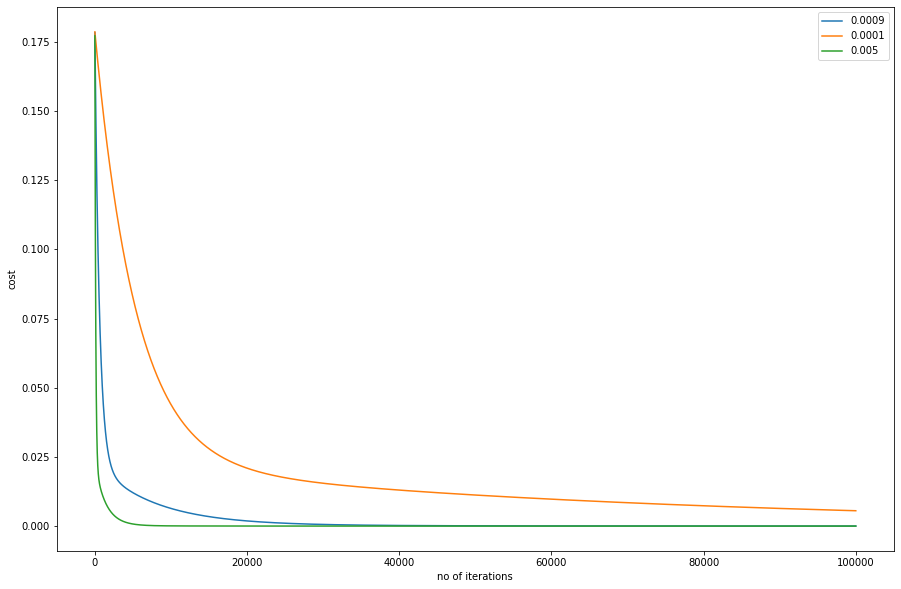

In [38]:
import matplotlib.pyplot as plt
x_axis = [*range(0, 100000, 1)]
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(x_axis, cost4, label = "0.0009")
plt.plot(x_axis, cost5, label = "0.0001") 
plt.plot(x_axis, cost6, label = "0.005")  
plt.xlabel('no of iterations') 
plt.ylabel('cost')
plt.legend() 
plt.show()

# When 0-0.5% of values are missing of that feature

For categorical data we can replace the missing values with mode of the feature. For continuous data we can replace the missing values with the mean of the feature.

# When 60-70% of values are missing of that feature

It is advisable to drop the column.

# When 8-10% of values are missing of that feature

We can first check the accuracy by replacing the missing values of the feature with mean(for continuous data) or mode(for categorical data). Then we can check the accuracy by dropping the column. Whichever experiment gives better accuracy it can be used.